In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from encodings.aliases import aliases

In [5]:
%matplotlib inline

In [7]:
#Read csv file and remove duplicates
#Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding)
        print('successful',encoding)
    except:
        pass
        



successful iso8859_3
successful cp500
successful cp860
successful mac_cyrillic
successful iso8859_4
successful utf_16_be
successful cp866
successful kz1048
successful iso8859_15
successful iso8859_10
successful cp855
successful gbk
successful cp437
successful cp852
successful cp1258
successful cp1254
successful cp1252
successful cp861
successful iso8859_5
successful latin_1
successful cp1125
successful cp1251
successful iso8859_7
successful cp932
successful iso8859_9
successful cp1253
successful iso8859_14
successful cp1140
successful iso8859_11
successful cp1026
successful cp857
successful iso8859_16
successful cp1257
successful mac_roman
successful iso8859_8
successful cp1255
successful iso8859_2
successful cp1256
successful cp862
successful cp850
successful cp864
successful koi8_r
successful cp863
successful ptcp154
successful mac_latin2
successful utf_16_le
successful cp037
successful mbcs
successful cp273
successful hp_roman8
successful cp858
successful big5hkscs
successful mac_tu

In [9]:
#Read in the crime.csv file and use the timestamp as datetime index
crime = pd.read_csv("crime.csv", encoding = "ISO-8859-11")

In [11]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [27]:
crime.shape

(319073, 17)

In [38]:
# Identfying and Removing Duplicates
crime.duplicated().sum()
crime.drop_duplicates(inplace=True)

In [40]:
crime.shape

(319050, 17)

In [42]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [48]:
#Converting the data from object to datetime for the occurred_on_date column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [50]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [52]:
# Summary information on numeric columns
crime.describe()


,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [54]:
#Sumarry information on non-numeric columns
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [74]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col+ " has " + str(unique_count) + " unique values ")

INCIDENT_NUMBER has 282517 unique values 
OFFENSE_CODE has 222 unique values 
OFFENSE_CODE_GROUP has 67 unique values 
OFFENSE_DESCRIPTION has 244 unique values 
DISTRICT has 12 unique values 
REPORTING_AREA has 879 unique values 
SHOOTING has 1 unique values 
OCCURRED_ON_DATE has 233229 unique values 
YEAR has 4 unique values 
MONTH has 12 unique values 
DAY_OF_WEEK has 7 unique values 
HOUR has 24 unique values 
UCR_PART has 4 unique values 
STREET has 4657 unique values 
Lat has 18178 unique values 
Long has 18178 unique values 
Location has 18194 unique values 


In [76]:
#Answering some questions

In [78]:
#What are the most common crimes in terms of offense group

crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

In [88]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
display(offense_group_vals/crime.shape[0])



OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

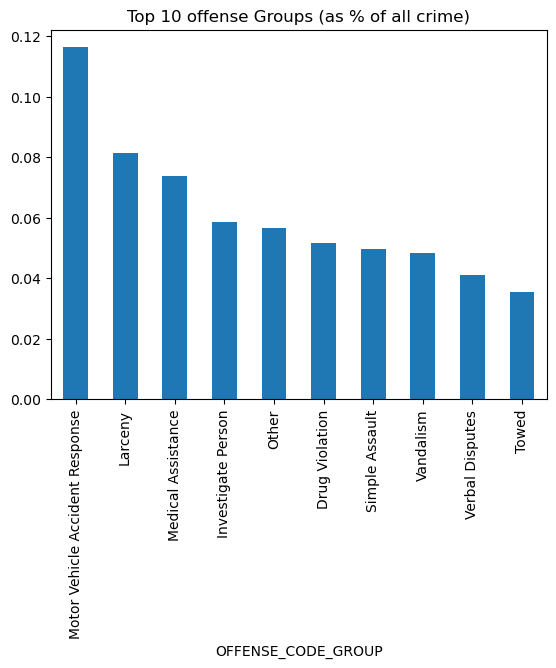

In [96]:
#Creating a bar chart of the top 10 offense groups
(offense_group_vals/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 offense Groups (as % of all crime)');


In [100]:
#what are the least common offense groups?

crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

In [104]:
#What are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()[:1]

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON    18783
Name: count, dtype: int64

In [116]:
offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]
display(offense_description_vals)

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

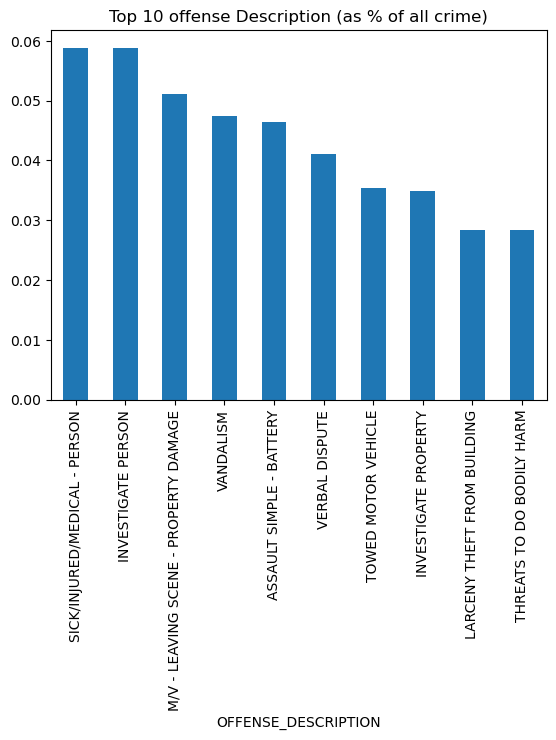

In [118]:
#Creating a bar chart of the top 10 offense Description as a % of total 
(offense_description_vals/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 offense Description (as % of all crime)');


Text(0.5, 1.0, 'Number of Crime')

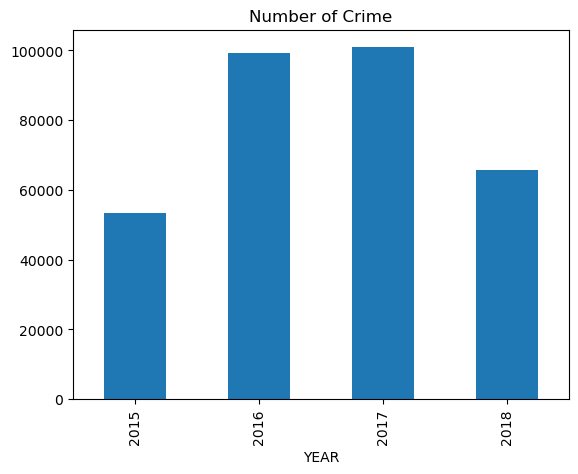

In [120]:
# In which year were the most crimes committed 
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of Crime')


DAY_OF_WEEK
Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crime grouped by Days')

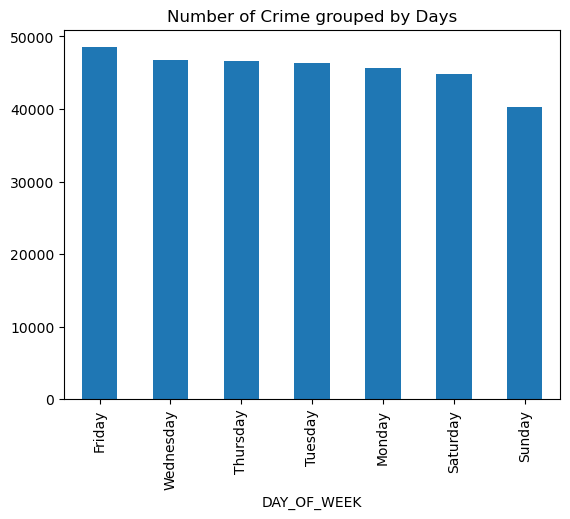

In [29]:
#Are there more crimes committed on specific days?
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False))
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');
plt.title('Number of Crime grouped by Days')

HOUR
17    20763
18    20302
16    19871
12    18679
19    17588
14    17189
13    16846
15    16522
11    16448
10    16347
20    15850
0     15106
9     14740
21    14111
8     13043
22    12926
23    10596
1      9269
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crime grouped by Hour')

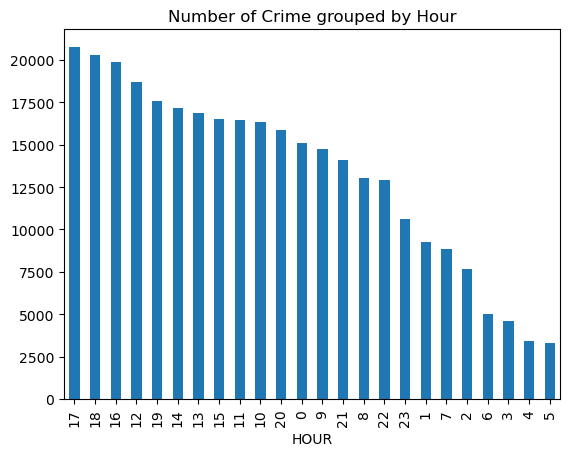

In [31]:
#Are there more crimes during specific hours?
display(crime.groupby('HOUR').count()['INCIDENT_NUMBER'].sort_values(ascending=False))
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');
plt.title('Number of Crime grouped by Hour')

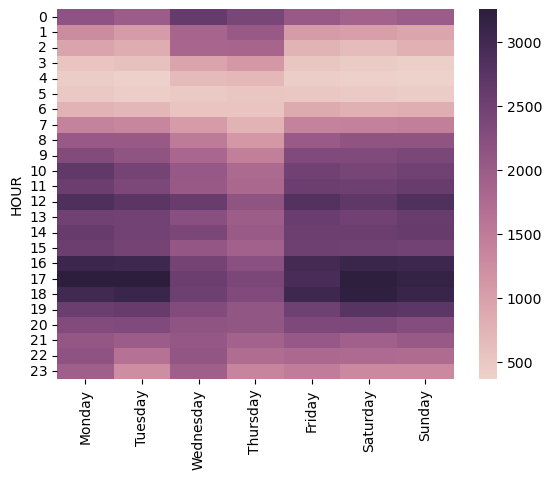

In [49]:
# On what days and during which hour are the most crimes committed?
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));


In [93]:
#In which months on average did the most crimes occur?
avg_crime = crime.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))
def style_negative(v, props=''):
    return props if v < avg_crime else None
    s2 = year_and_month.style.applymap(style_negative, props='color:blue;')
s2




The average number of crimes is 7976.825


MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,nan,nan,nan,nan,nan,4191.000000,8324.000000,8342.000000,8414.000000,8308.000000,7818.000000,7991.000000
2016,7835.000000,7308.000000,8199.000000,8101.000000,8578.000000,8558.000000,8619.000000,8938.000000,8522.000000,8583.000000,7922.000000,7951.000000
2017,7993.000000,7408.000000,8179.000000,8069.000000,8715.000000,8985.000000,9075.000000,9206.000000,8940.000000,8846.000000,7935.000000,7535.000000
2018,7782.000000,6937.000000,7768.000000,7916.000000,8906.000000,8834.000000,8538.000000,8337.000000,667.000000,nan,nan,nan


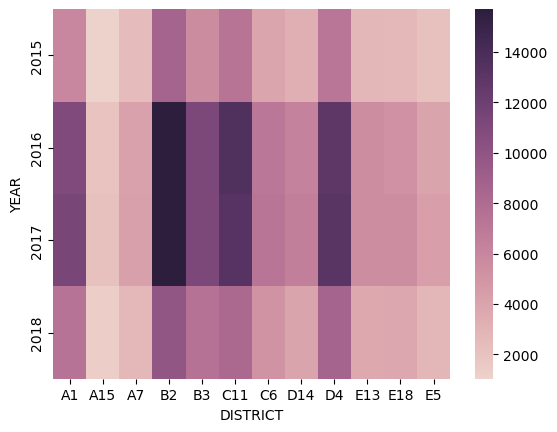

In [173]:
# In which districts were the most crimes comitted on yearly basis?
Max_crime = crime.groupby(['YEAR','DISTRICT']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(Max_crime, cmap=sns.cubehelix_palette(as_cmap=True));
